In [1]:
# 최고 기온의 날짜와 기온 구하기 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./seoul.csv', encoding='CP949')

seoul = df.dropna()

max_temp = seoul['최고기온(℃)'].max()
max_data = seoul[seoul['최고기온(℃)'] == max_temp]
max_data[['날짜', '최고기온(℃)']]

seoul_data = seoul.set_index('날짜')
col_index = seoul_data.columns
seoul_data[seoul_data[col_index[3]] == seoul_data.max()[3]][col_index[3]]

'''df = pd.read_csv('./Seoul_Temp/seoul.csv', encoding='cp949')

df.fillna(-100, inplace=True)

values = df.values.tolist()

max_temp = -999
max_date = ''

for row in values:
    if row[-1] == -100.0:
        row[-1] = -999
    row[-1] = float(row[-1])
    if max_temp < row[-1]:
        max_date = row[0]
        max_temp = row[-1]

print('기상 관측 이래 서울의 최고 기온이 가장 높았던 날은',max_date,'로',max_temp,'도 였습니다.')'''

날짜
2018-08-01    39.6
Name: 최고기온(℃), dtype: float64

In [2]:
# 각 기온 별 결측값 구하기 

print(df[df['평균기온(℃)'].isnull()])
print(df[df['최저기온(℃)'].isnull()])
print(df[df['최고기온(℃)'].isnull()])

               날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
15676  1950-09-01  108      NaN      NaN      NaN
15677  1950-09-02  108      NaN      NaN      NaN
15678  1950-09-03  108      NaN      NaN      NaN
15679  1950-09-04  108      NaN      NaN      NaN
15680  1950-09-05  108      NaN      NaN      NaN
...           ...  ...      ...      ...      ...
16427  1953-11-26  108      NaN      NaN      NaN
16428  1953-11-27  108      NaN      NaN      NaN
16429  1953-11-28  108      NaN      NaN      NaN
16430  1953-11-29  108      NaN      NaN      NaN
16431  1953-11-30  108      NaN      NaN      NaN

[756 rows x 5 columns]
               날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
15676  1950-09-01  108      NaN      NaN      NaN
15677  1950-09-02  108      NaN      NaN      NaN
15678  1950-09-03  108      NaN      NaN      NaN
15679  1950-09-04  108      NaN      NaN      NaN
15680  1950-09-05  108      NaN      NaN      NaN
...           ...  ...      ...      ...      ...
16428  1953-11-27  108    

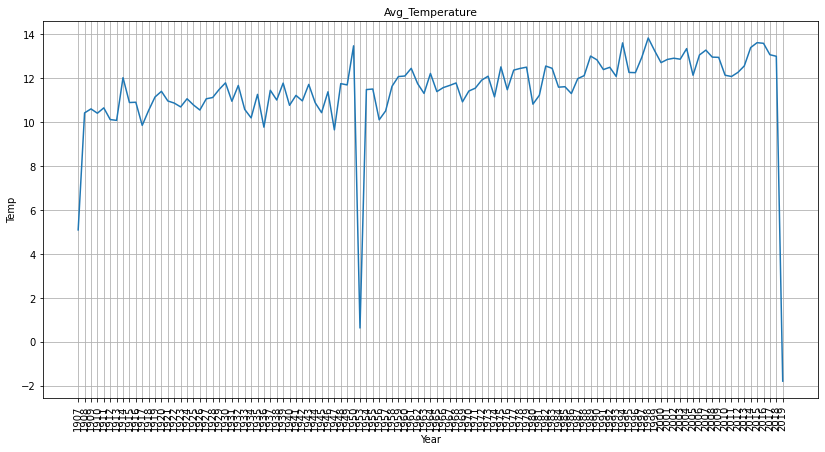

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./seoul.csv', encoding='CP949')

df1 = df.isna() # isna()를 활용하여 결측값 여부 확인
none = df1[df1['평균기온(℃)']==True].index # 결측값의 index값만 추출 
avg_data = df.drop(none) # 추출된 index값이 있는 행 제거 
avg_data = avg_data.drop(['지점', '최저기온(℃)', '최고기온(℃)'], axis=1) # 새로 완성된 데이터의 ['지점', '최저기온(℃)', '최고기온(℃)'] 컬럼 제거 

avg_year = avg_data['날짜'].to_list() 
# avg_data의 날짜 컬럼의 값들을 리스트 형식으로 변환

year = []

for y in avg_year:
    year.append(y[:4]) # 날짜에서 년도 부분만 year에 추가 

avg_data['날짜'] = year # 기존 avg_data의 날짜값을 year로 치환

values = avg_data.groupby('날짜').mean().values.tolist()
# values 변수에 날짜로 묶어서 나온 평균값의 값들을 리스트 형식으로 변환값 저장
indexs = avg_data.groupby('날짜').mean().index
# indexs 변수에 날짜로 묶어서 나온 index값을 저장

fig,ax = plt.subplots() # figure와 axes 값을 받는다 
x = 1000 / fig.dpi # 가로 길이 (1000 pixel)
y = 500 / fig.dpi # 세로 길이 (500 pixel)
fig.set_figwidth(x)
fig.set_figheight(y)
ax.plot(indexs, values) # 그리고자 하는 그래프의 x, y값 입력
plt.rc('font', size = 9) # 그래프에 나오는 폰트 크기 조정
plt.xticks(np.arange(0,111,1), rotation=90) # x출의 길이와 간격, 표시되는 단어의 방향을 설정
plt.xlabel('Year') # x축의 이름생성
plt.ylabel('Temp') # y축의 이름생성
plt.title('Avg_Temperature') # 그래프의 타이틀 생성
plt.grid(True) # 그래프 뒤에 있는 선 생성
plt.show(ax) # ax에 저장된 그래프 표현 

#plt.savefig('Avg_Temperature1.png') # 그래프 사진 파일로 저장 


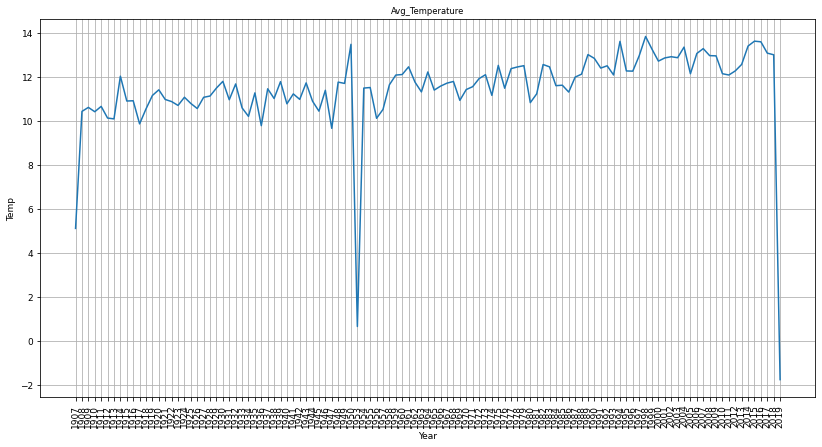

<Figure size 432x288 with 0 Axes>

In [4]:
# 각 연도별 평균 온도 그래프로 나타내기 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./seoul.csv', encoding='CP949')

avg_data = df.dropna()
avg_data = avg_data.drop(['지점', '최저기온(℃)', '최고기온(℃)'], axis=1)

avg_year = avg_data['날짜'].to_list()

year = []

for y in avg_year:
    year.append(y[:4])

avg_data['날짜'] = year

values = avg_data.groupby('날짜').mean().values.tolist()

indexs = avg_data.groupby('날짜').mean().index

test = avg_data.groupby('날짜').mean()

#test.to_csv('Avg_temp.csv')

fig,ax = plt.subplots()
x = 1000 / fig.dpi
y = 500 / fig.dpi 
fig.set_figwidth(x)
fig.set_figheight(y)
ax.plot(indexs, values)
plt.rc('font', size = 7)
plt.xticks(np.arange(0,111,1), rotation=90)
plt.xlabel('Year')
plt.ylabel('Temp')
plt.title('Avg_Temperature')
plt.grid(True)
plt.show(ax)

#plt.savefig('Avg_Temperature.png')

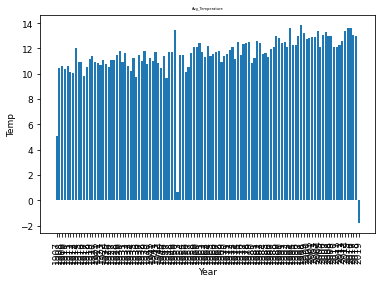

In [2]:
# 각 연도별 평균 온도 막대그래프로 그리기 

avg_data = df.dropna()
avg_data = avg_data.drop(['지점', '최저기온(℃)', '최고기온(℃)'], axis=1)

avg_year = avg_data['날짜'].to_list()

year = []
for y in avg_year:
    year.append(y[:4])

avg_data['날짜'] = year

years = avg_data.groupby('날짜').mean()

year1 = years['평균기온(℃)'].values

x = np.arange(111)
y = set(year)
y = sorted(y)

plt.bar(x, year1)
plt.xticks(x, y, rotation=90)
plt.rc('font', size = 3)
plt.xlabel('Year')
plt.ylabel('Temp')
plt.title('Avg_Temperature')
plt.show()

#plt.savefig('Avg_Temperature_Bar.png')

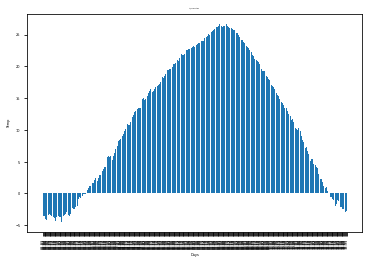

In [6]:
# 각 일별 평균 온도 막대 그래프로 나타내기

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./seoul.csv', encoding='CP949')

non = df[df['평균기온(℃)'].isna() == True].index

avg_data = df.drop(non)

avg_year = avg_data['날짜'].to_list()

days = []

for y in avg_year:
    days.append(y[5:])

avg_data['날짜'] = days

avg_data = avg_data.drop(['최저기온(℃)', '최고기온(℃)','지점'], axis=1)

years = avg_data.groupby('날짜').mean()

year1 = years['평균기온(℃)'].values

x = np.arange(366)
y = set(days)
y = sorted(y)

plt.bar(x, year1)
plt.xticks(x, y, rotation=90)
plt.rc('font', size = 1)
plt.xlabel('Days')
plt.ylabel('Temp')
plt.title('Avg_Temperature')
plt.show()

#plt.savefig('Avg_Temperature_Bar.png', dpi=400)


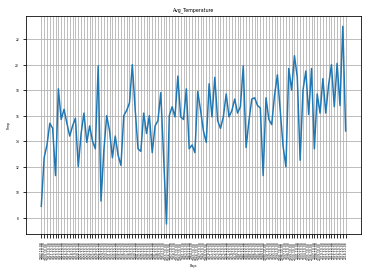

<Figure size 1440x360 with 0 Axes>

In [3]:
# 특정 날짜의 연 평균 온도를 그래프로 나타내기 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./seoul.csv', encoding='CP949')

non = df[df['평균기온(℃)'].isna() == True].index

avg_data = df.drop(non)

avg_year = avg_data['날짜'].to_list()

days = []

for y in avg_year:
    if y[5:] == '10-08':
        days.append(y)

avg_data.drop(['최저기온(℃)', '최고기온(℃)','지점'], axis=1, inplace=True)

avg_data = avg_data.set_index('날짜')

y = avg_data.loc[days]
x = np.arange(108)

plt.plot(x,y)
plt.xticks(x, days, rotation=90)
plt.rc('font', size =4)
plt.xlabel('Days')
plt.ylabel('Temp')
plt.title('Avg_Temperature')
plt.grid(True)
plt.figure(figsize=(20,5))
plt.show()

#plt.savefig('Avg_Temperature_Bar.png', dpi=400)


min: -16.3
1/4: 7.2
2/4: 18.6
3/4: 26.2
max: 39.6


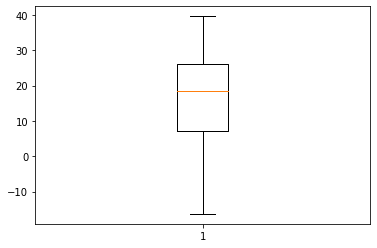

In [21]:
# 데이터에 존재하는 각 날짜를 boxplot으로 나타내기 

import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('./seoul.csv', encoding='cp949')
data = csv.reader(f)
next(data)

temp = []

for row in data:
    if row[4] != '':
        temp.append(float(row[4]))

y = sorted(temp)

plt.boxplot(y)

y_nparray = np.array(y)

print(f'min: {np.percentile(y_nparray, 0)}')
print(f'1/4: {np.percentile(y_nparray, 25)}')
print(f'2/4: {np.percentile(y_nparray, 50)}')
print(f'3/4: {np.percentile(y_nparray, 75)}')
print(f'max: {np.percentile(y_nparray, 100)}')
